In [1]:
import requests
import datetime as datetime
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import quandl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
result = requests.get(url)

splitter1 = result.text.split('component companies.')[1] #Vil gerne have alt data efter her [1]
splitter2 = splitter1.split("0001555280")[0] #Vil gerne have alt data før her eg [0]
splitter3 = splitter2.split("href=") #Split ved link

splitter3

data = []

for i in range(len(splitter3)):
    if 'nyse' in splitter3[i]:
        Ticker = splitter3[i].split('">')[1].split('</')[0]
        data.append(Ticker)
    if 'nasdaq' in splitter3[i]:
        Ticker = splitter3[i].split('">')[1].split('</')[0]
        data.append(Ticker)

CCC = [e.replace(".", "-") for e in data]

quandl.ApiConfig.api_key = ''

GG = pd.DataFrame()
VOLUME = pd.DataFrame()


for sym in CCC:
    GG[sym] = web.DataReader(sym, 'yahoo', '2015-01-01', datetime.datetime.today())['Adj Close']

SPY = web.DataReader('SPY', 'yahoo','2015-01-01', datetime.datetime.today())['Adj Close']

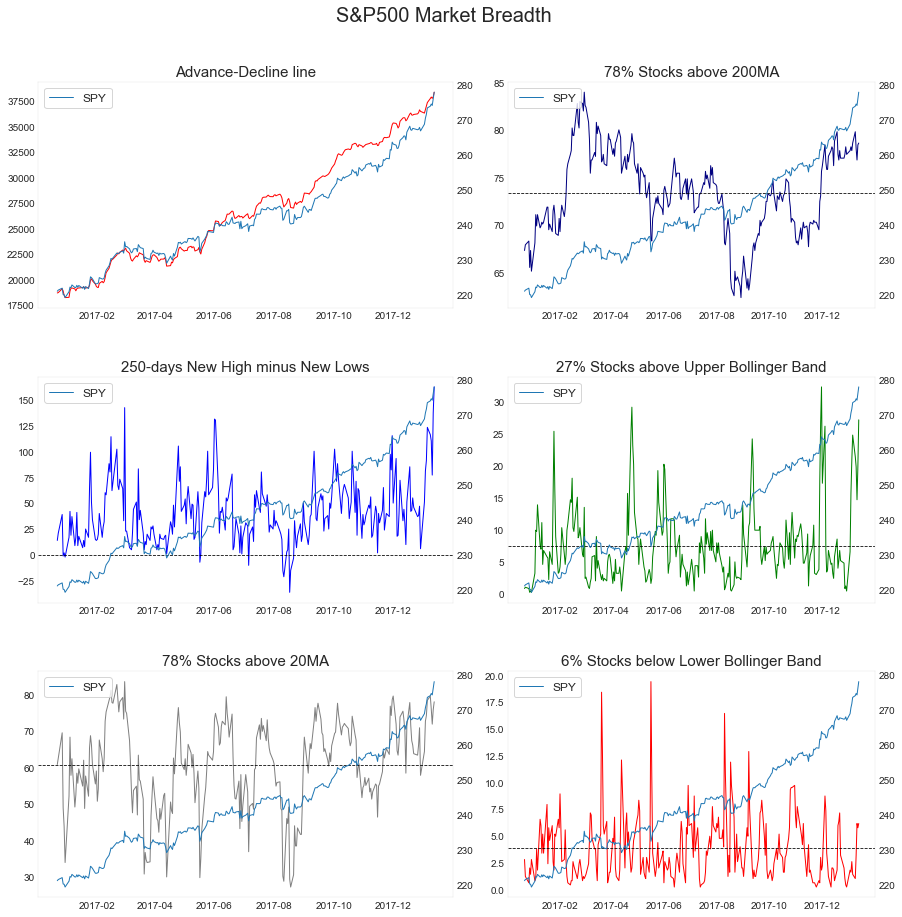

In [2]:
Average = GG.rolling(20).mean()
Above_Average = GG > Average
Percentage = Above_Average.sum(axis=1)/505*100

Average2 = GG.rolling(200).mean()
Above_Average2 = GG > Average2
Percentage2 = Above_Average2.sum(axis=1)/505*100

Standard = GG.rolling(20).std()
Upper = Average + (Standard * 2)
Lower = Average - (Standard * 2)
Above_Upper = GG > Upper
Below_Lower = GG < Lower

U = Above_Upper.sum(axis=1)/(np.count_nonzero(GG.columns))*100
L = Below_Lower.sum(axis=1)/(np.count_nonzero(GG.columns))*100

newhighs = GG > GG.rolling(250).max().shift(1)
newlows = GG < GG.rolling(250).min().shift(1)
newhighsTotal = newhighs.sum(axis=1)
newlowsTotal = newlows.sum(axis=1)
High_Low = newhighsTotal - newlowsTotal

Advancing_stocks = GG > GG.shift(1)
Declining_stocks = GG < GG.shift(1)
Number_Advancing = Advancing_stocks.sum(axis=1)
Number_Declining = Declining_stocks.sum(axis=1)
AD = (Number_Advancing - Number_Declining)
AdvanceDecline = (Number_Advancing - Number_Declining) + AD.shift(1)
AD_Line = AdvanceDecline.cumsum()

plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.linewidth'] = 0.1

plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((14,18), (0,0), rowspan=4, colspan=9)
ax2 = plt.subplot2grid((14,18), (5,0), rowspan=4, colspan=9)
ax3 = plt.subplot2grid((14,18), (10,0), rowspan=4, colspan=9)
ax4 = plt.subplot2grid((14,18), (0,10), rowspan=4, colspan=9)
ax5 = plt.subplot2grid((14,18), (5,10), rowspan=4, colspan=9)
ax6 = plt.subplot2grid((14,18), (10,10), rowspan=4, colspan=9)

plt.suptitle('S&P500 Market Breadth',y=0.95, fontsize=20)

ax1.plot(AD_Line[499:],'red', lw=1)
ax1.grid(False)
ax1.set_title('Advance-Decline line',fontsize=15)
ax10 = ax1.twinx()
ax10.plot(SPY[499:], label='SPY',lw=1)
ax10.grid(False)
ax10.legend(fontsize='large',frameon=1)

ax2.plot(High_Low[499:],'blue', lw=1)
ax2.grid(False)
ax2.axhline(0, ls='--', lw=0.8, c='black')
ax2.legend(loc=2,frameon=1,fontsize='medium')
ax2.set_title('250-days New High minus New Lows',fontsize=15)
ax20 = ax2.twinx()
ax20.plot(SPY[499:], label='SPY',lw=1)
ax20.grid(False)
ax20.legend(fontsize='large',frameon=1)

ax3.plot(Percentage[499:],'grey', lw=1)
ax3.grid(False)
ax3.axhline(Percentage[499:].mean(), ls='--', lw=0.8, c='k')
ax3.legend(loc=2,frameon=1,fontsize='medium')
ax3.set_title(str(int(Percentage[-1]))+'% Stocks above 20MA',fontsize=15)
ax30 = ax3.twinx()
ax30.plot(SPY[499:], label='SPY',lw=1)
ax30.grid(False)
ax30.legend(fontsize='large',frameon=1)

ax4.plot(Percentage2[499:],'navy', lw=1)
ax4.grid(False)
ax4.axhline(Percentage2[499:].mean(), ls='--', lw=0.8, c='k')
ax4.legend(loc=2,frameon=1,fontsize='medium')
ax4.set_title(str(int(Percentage2[-1]))+'% Stocks above 200MA',fontsize=15)
ax40 = ax4.twinx()
ax40.plot(SPY[499:], label='SPY',lw=1)
ax40.grid(False)
ax40.legend(fontsize='large',frameon=1)

ax5.plot(U[499:],'g', lw=1)
ax5.grid(False)
ax5.axhline(U[499:].mean(), ls='--', lw=0.8, c='k')
ax5.legend(loc=2,frameon=1,fontsize='medium')
ax5.set_title(label=str(int(U[-1]))+'% Stocks above Upper Bollinger Band',fontsize=15)
ax50 = ax5.twinx()
ax50.plot(SPY[499:], label='SPY',lw=1)
ax50.grid(False)
ax50.legend(fontsize='large',frameon=1)

ax6.plot(L[499:],'r', lw=1)
ax6.grid(False)
ax6.axhline(L[499:].mean(), ls='--', lw=0.8, c='k')
ax6.legend(loc=2,frameon=1,fontsize='medium')
ax6.set_title(label=str(int(L[-1]))+'% Stocks below Lower Bollinger Band',fontsize=15)
ax60 = ax6.twinx()
ax60.plot(SPY[499:], label='SPY',lw=1)
ax60.grid(False)
ax60.legend(fontsize='large',frameon=1)
plt.savefig('C:\Users\Aleksander\Desktop\MARKETBREADTH.png',dpi=400,bbox_inches='tight',pad_inches=0)